In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

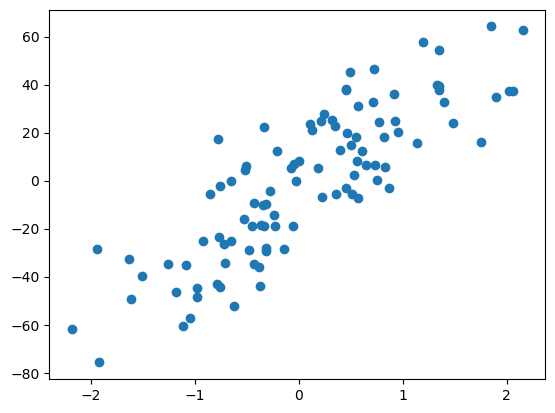

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [8]:
print(reg.coef_)
print(reg.intercept_)

[27.36362493]
-3.616633538842648


C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+04, tolerance: 7.492e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

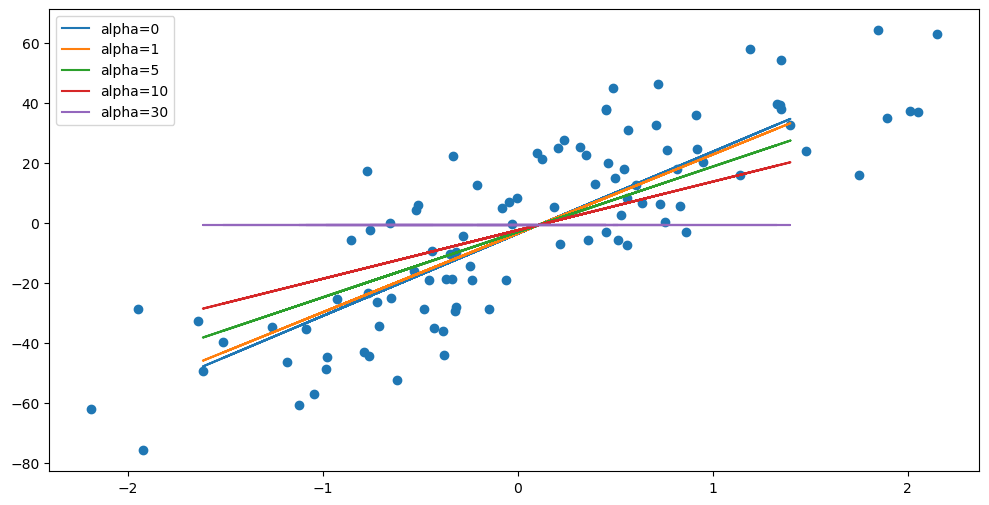

In [10]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

# In Polynomial data

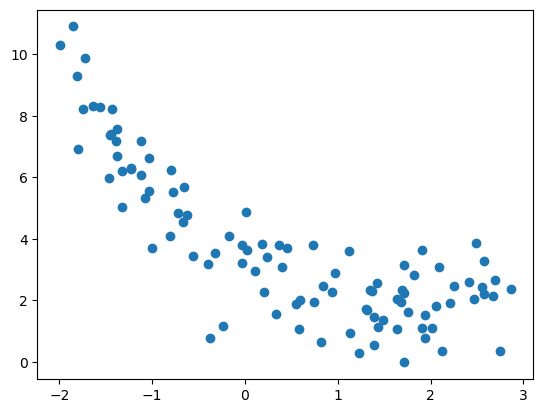

In [13]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()


C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.692e+01, tolerance: 6.188e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

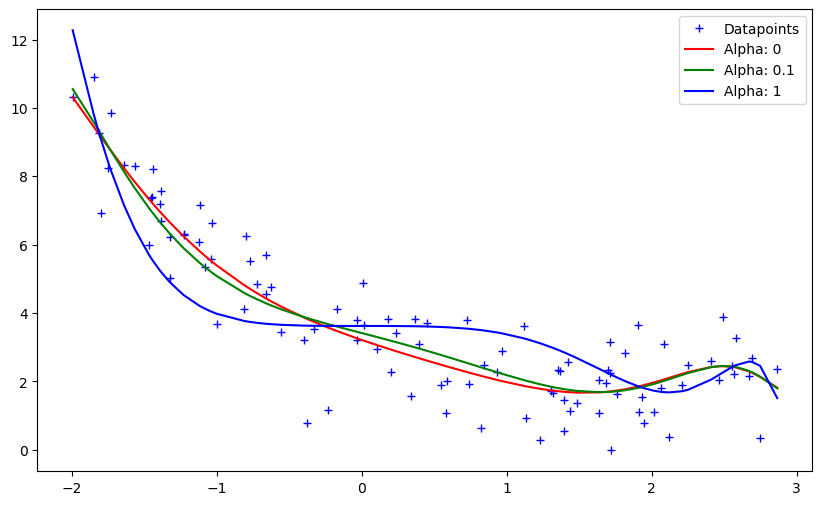

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [28]:

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [30]:
data = load_diabetes()

In [24]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [35]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)


In [43]:

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [45]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

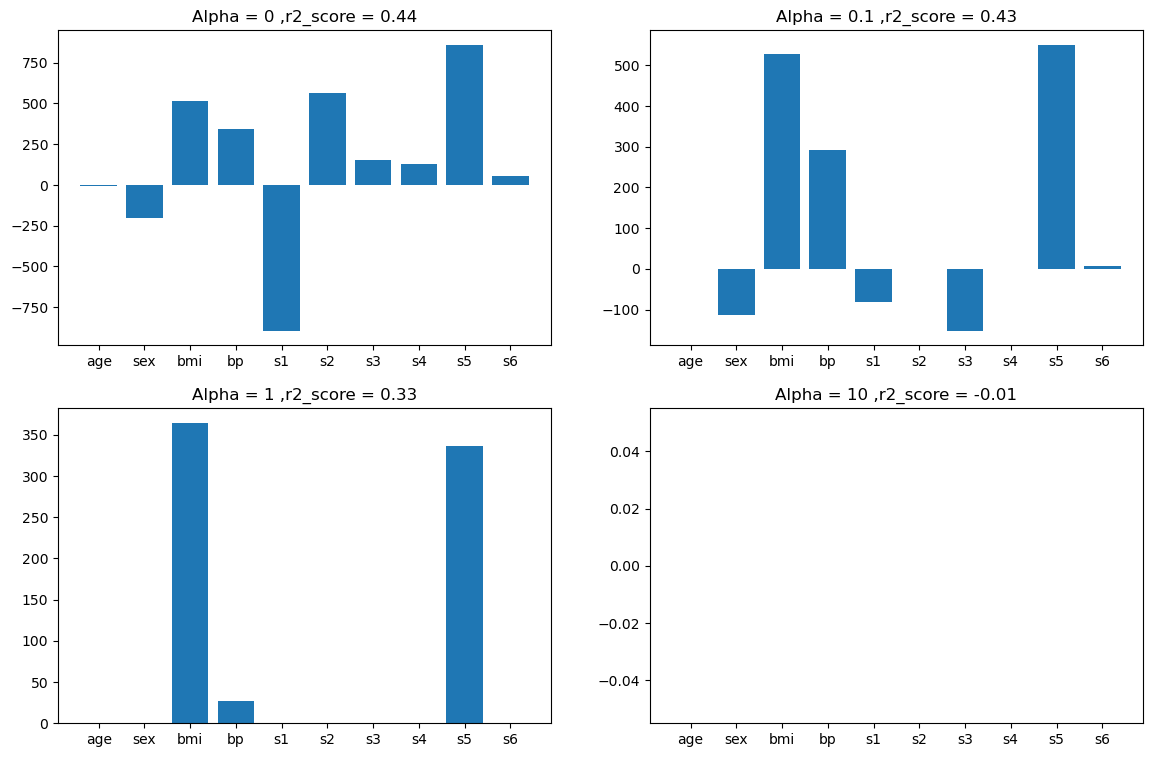

In [47]:

plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()